<h2>Importing modules required for running the code</h2>

In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, classification_report
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,Flatten
from keras.layers import BatchNormalization


2025-10-28 13:37:28.315509: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-28 13:37:28.333536: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-28 13:37:28.411475: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-28 13:37:28.474090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761638848.535169    2521 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761638848.55

<h2>Columns Name for our testing and training data </h2>

In [2]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

<h2> Training Dataset </h2>

In [3]:
awid = pd.read_csv("AWID-CLS-R-Trn/1", header=None, names=features)

/tmp/ipykernel_2521/272305998.py:1: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  awid = pd.read_csv("AWID-CLS-R-Trn/1", header=None, names=features)


<h2> Data Exploration</h2>

In [4]:
awid.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal


In [5]:
awid.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,radiotap.datarate,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order
count,1795575.0,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0,1795575.0,...,1.795575e+06,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0
mean,0.0,0.0,1.393663e+09,2.004690e-03,2.004690e-03,1.870294e+03,5.153149e+02,5.153149e+02,0.0,0.0,...,2.513950e+01,0.0,1.272582e+00,8.499055e+00,3.748103e-04,1.271080e-01,2.325216e-02,1.772691e-03,4.932927e-01,0.0
std,0.0,0.0,8.674448e+02,6.379536e-03,6.379536e-03,8.674448e+02,6.649245e+02,6.649245e+02,0.0,0.0,...,2.373590e+01,0.0,8.198060e-01,4.173015e+00,1.935639e-02,3.330940e-01,1.507034e-01,4.206602e-02,4.999551e-01,0.0
min,0.0,0.0,1.393661e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.0,1.393662e+09,3.150000e-04,3.150000e-04,1.027875e+03,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.0,0.0,1.393663e+09,5.490000e-04,5.490000e-04,1.902614e+03,1.120000e+02,1.120000e+02,0.0,0.0,...,2.400000e+01,0.0,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.0,0.0,1.393664e+09,1.113000e-03,1.113000e-03,2.524325e+03,1.552000e+03,1.552000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
max,0.0,0.0,1.393665e+09,3.502630e-01,3.502630e-01,3.599571e+03,1.570000e+03,1.570000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [6]:
awid['class'].value_counts()

class
normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: count, dtype: int64

In [7]:
awid.isna().sum()

frame.interface_id               0
frame.dlt                        0
frame.offset_shift               0
frame.time_epoch                 0
frame.time_delta                 0
                                ..
wlan.qos.bit4                    0
wlan.qos.txop_dur_req            0
wlan.qos.buf_state_indicated2    0
data.len                         0
class                            0
Length: 155, dtype: int64

<h2> Dropping columns with 50% of null data</h2>

In [8]:
awid.replace({"?":None}, inplace=True)
null_column=awid.columns[awid.isnull().mean() >= 0.51]
null_column.shape

(70,)

<h2>Dropping all the null rows</h2>

In [9]:
awid.drop(null_column, axis=1, inplace=True)
awid.dropna(inplace=True)

In [10]:
awid.isna().sum()

frame.interface_id            0
frame.offset_shift            0
frame.time_epoch              0
frame.time_delta              0
frame.time_delta_displayed    0
                             ..
wlan.seq                      0
wlan.fcs_good                 0
wlan.wep.key                  0
data.len                      0
class                         0
Length: 85, dtype: int64

In [11]:
awid['class'].value_counts()


class
normal           775634
injection         65379
impersonation     44731
Name: count, dtype: int64

<h2>Converting all the Columns to numeric</h2>

In [12]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')

/tmp/ipykernel_2521/2988672956.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  awid[col]=pd.to_numeric(awid[col], errors='ignore')


In [13]:
awid.select_dtypes(['number']).head()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
17,0,0.0,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,0,0,...,0,0,1,0,44,0,96,1,0,1460
18,0,0.0,1.393661e+09,0.000621,0.000621,0.218139,124,124,0,0,...,0,0,1,0,44,0,1217,1,0,60
20,0,0.0,1.393661e+09,0.000144,0.000144,0.229118,153,153,0,0,...,0,0,1,0,44,0,97,1,0,89
28,0,0.0,1.393661e+09,0.021711,0.021711,0.367359,124,124,0,0,...,0,0,1,0,44,0,1220,1,0,60
31,0,0.0,1.393661e+09,0.000058,0.000058,0.380933,124,124,0,0,...,0,0,1,0,44,0,99,1,0,60


<h2>Splitting the training data</h2>

In [14]:
X_train, y_train = awid.select_dtypes(['number']), awid['class']


In [15]:
y_train.value_counts()

class
normal           775634
injection         65379
impersonation     44731
Name: count, dtype: int64

In [16]:
X_train.shape

(885744, 76)

<h2>Testing Data</h2>

In [17]:
awid_test = pd.read_csv("AWID-CLS-R-Tst/1", header=None, names=features)


/tmp/ipykernel_2521/1131828012.py:1: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  awid_test = pd.read_csv("AWID-CLS-R-Tst/1", header=None, names=features)


<h2>Cleaning testing data</h2>

In [18]:
awid_test.isna().sum()
awid_test.replace({"?":None}, inplace=True)
test_null_column=awid_test.columns[awid_test.isnull().mean() >= 0.5]
awid_test.drop(test_null_column, axis=1, inplace=True)
awid_test.dropna(inplace=True)

for col in awid_test.columns:
    awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')


X_test, y_test = awid_test.select_dtypes(['number']), awid_test['class']


/tmp/ipykernel_2521/2477305186.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')


In [19]:
X_test

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
0,0,0.0,1.393668e+09,0.000000,0.000000,0.000000,1552,1552,0,0,...,0,0,1,0,44,0,2313,1,0,1488
1,0,0.0,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,0,0,...,0,0,1,0,44,0,2314,1,0,1488
4,0,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,0,...,0,0,1,0,44,0,2318,1,0,1488
5,0,0.0,1.393668e+09,0.006015,0.006015,0.009210,1552,1552,0,0,...,0,0,1,0,44,0,2328,1,0,1488
6,0,0.0,1.393668e+09,0.000940,0.000940,0.010150,1552,1552,0,0,...,0,0,1,0,44,0,2330,1,0,1488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575635,0,0.0,1.393669e+09,0.005206,0.005206,1200.252450,177,177,0,0,...,0,0,1,0,44,0,1404,1,0,113
575637,0,0.0,1.393669e+09,0.003354,0.003354,1200.261305,124,124,0,0,...,0,0,1,0,44,0,1405,1,0,60
575640,0,0.0,1.393669e+09,0.008112,0.008112,1200.275545,124,124,0,0,...,0,0,1,0,44,0,1407,1,0,60
575641,0,0.0,1.393669e+09,0.006147,0.006147,1200.281692,1524,1524,0,0,...,0,0,1,0,44,0,420,1,0,1460


In [20]:
X_test.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
count,313248.0,313248.0,3.132480e+05,313248.000000,313248.000000,313248.000000,313248.000000,313248.000000,313248.0,313248.0,...,313248.000000,313248.000000,313248.0,313248.0,313248.000000,313248.000000,313248.000000,313248.0,313248.000000,313248.000000
mean,0.0,0.0,1.393669e+09,0.001238,0.001238,419.131540,892.088681,892.088681,0.0,0.0,...,0.000354,0.008897,1.0,0.0,80.225144,0.121674,1849.670600,1.0,0.065405,828.889611
std,0.0,0.0,3.968335e+02,0.003632,0.003632,396.833483,713.371196,713.371196,0.0,0.0,...,0.018821,0.093904,0.0,0.0,98.175003,0.522946,1158.063441,0.0,0.250803,712.901695
min,0.0,0.0,1.393668e+09,0.000000,0.000000,0.000000,65.000000,65.000000,0.0,0.0,...,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,3.000000
25%,0.0,0.0,1.393668e+09,0.000393,0.000393,74.256986,124.000000,124.000000,0.0,0.0,...,0.000000,0.000000,1.0,0.0,44.000000,0.000000,920.000000,1.0,0.000000,60.000000
50%,0.0,0.0,1.393668e+09,0.000608,0.000608,255.078000,1552.000000,1552.000000,0.0,0.0,...,0.000000,0.000000,1.0,0.0,44.000000,0.000000,1646.000000,1.0,0.000000,1488.000000
75%,0.0,0.0,1.393669e+09,0.000965,0.000965,852.944268,1552.000000,1552.000000,0.0,0.0,...,0.000000,0.000000,1.0,0.0,44.000000,0.000000,2812.000000,1.0,0.000000,1488.000000
max,0.0,0.0,1.393669e+09,0.344335,0.344335,1200.289872,1570.000000,1570.000000,0.0,0.0,...,1.000000,1.000000,1.0,0.0,314.000000,11.000000,4095.000000,1.0,3.000000,1508.000000


In [21]:
y_test.value_counts()

class
normal           277960
impersonation     18606
injection         16682
Name: count, dtype: int64

<h2>Preprocessing and Feature Scaling   </h2> 

In [22]:
sc=StandardScaler()
sc.fit(X_train)
scaled_X_train=sc.transform(X_train)

sc1=StandardScaler()
sc1.fit(X_test)
scaled_X_test=sc1.transform(X_test)

In [23]:
X_train

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
17,0,0.0,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,0,0,...,0,0,1,0,44,0,96,1,0,1460
18,0,0.0,1.393661e+09,0.000621,0.000621,0.218139,124,124,0,0,...,0,0,1,0,44,0,1217,1,0,60
20,0,0.0,1.393661e+09,0.000144,0.000144,0.229118,153,153,0,0,...,0,0,1,0,44,0,97,1,0,89
28,0,0.0,1.393661e+09,0.021711,0.021711,0.367359,124,124,0,0,...,0,0,1,0,44,0,1220,1,0,60
31,0,0.0,1.393661e+09,0.000058,0.000058,0.380933,124,124,0,0,...,0,0,1,0,44,0,99,1,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795504,0,0.0,1.393665e+09,0.015341,0.015341,3599.043342,112,112,0,0,...,0,0,1,0,48,0,2608,1,0,48
1795511,0,0.0,1.393665e+09,0.013841,0.013841,3599.086311,112,112,0,0,...,0,0,1,0,48,0,2609,1,0,48
1795551,0,0.0,1.393665e+09,0.000421,0.000421,3599.323495,1524,1524,0,0,...,0,0,1,0,44,0,0,1,0,1460
1795556,0,0.0,1.393665e+09,0.001861,0.001861,3599.375225,1523,1523,0,0,...,0,0,1,0,44,0,1,1,0,1459


In [24]:

print(X_train.dtypes)

frame.interface_id              int64
frame.offset_shift            float64
frame.time_epoch              float64
frame.time_delta              float64
frame.time_delta_displayed    float64
                               ...   
wlan.frag                       int64
wlan.seq                        int64
wlan.fcs_good                   int64
wlan.wep.key                    int64
data.len                        int64
Length: 76, dtype: object


In [25]:
print(scaled_X_train)
print(scaled_X_train.dtype)


[[ 0.          0.         -2.16853389 ...  0.         -0.18997616
   0.79605402]
 [ 0.          0.         -2.16853315 ...  0.         -0.18997616
  -1.20725951]
 [ 0.          0.         -2.16851995 ...  0.         -0.18997616
  -1.1657623 ]
 ...
 [ 0.          0.          2.15675522 ...  0.         -0.18997616
   0.79605402]
 [ 0.          0.          2.15681739 ...  0.         -0.18997616
   0.79462309]
 [ 0.          0.          2.15687823 ...  0.         -0.18997616
  -0.75508302]]
float64


<h2>Encoding the label data</h2>

In [26]:
encoder = LabelEncoder()
encoded_y=encoder.fit_transform(y_train)
enc_y_test=encoder.fit_transform(y_test)

In [27]:
encoder.classes_

array(['impersonation', 'injection', 'normal'], dtype=object)

In [28]:
enc_y_test

array([2, 2, 2, ..., 2, 2, 2])

<h2>Changing it to Categorical </h2>

In [29]:
cat_y_train=to_categorical(encoded_y)
cat_y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [30]:
cat_y_test=to_categorical(enc_y_test)
cat_y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

<h2>DNN for Multiclass Classification </h2>

In [31]:
#Neural Network(Multiclass/Categorical Crossentropy)
model2 = Sequential()
model2.add(Dense(10, input_shape=(scaled_X_train.shape[1],), activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(20, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
model2.summary()

/home/sriramchinmay/miniforge3/envs/workstation/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-28 13:49:37.439101: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-10-28 13:49:37.439129: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-10-28 13:49:37.439134: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: PappuChaaru
2025-10-28 13:49:37.439136: I external/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,053 (4.11 KB)

 Trainable params: 1,053 (4.11 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0,
                          patience = 3, verbose = 1, restore_best_weights = True)

In [33]:
hist=model2.fit(scaled_X_train,cat_y_train,batch_size=512,validation_split=0.1,
               callbacks=[earlystop],epochs=15, verbose=1)

Epoch 1/15
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9183 - loss: 0.2427 - val_accuracy: 0.9603 - val_loss: 0.2138
Epoch 2/15
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9838 - loss: 0.0386 - val_accuracy: 0.9664 - val_loss: 0.2627
Epoch 3/15
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9878 - loss: 0.0275 - val_accuracy: 0.9700 - val_loss: 0.2320
Epoch 4/15
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0211 - val_accuracy: 0.9701 - val_loss: 0.2300
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


In [34]:
loss, accuracy=model2.evaluate(scaled_X_train, cat_y_train)

27680/27680 ━━━━━━━━━━━━━━━━━━━━ 22s 784us/step - accuracy: 0.9993 - loss: 0.0038


In [35]:
accuracy

0.9951125979423523

In [36]:
model2_loss, model2_accuracy = model2.evaluate(scaled_X_test,cat_y_test)

9789/9789 ━━━━━━━━━━━━━━━━━━━━ 10s 986us/step - accuracy: 0.9848 - loss: 0.1240


In [37]:
print('Loss :{loss},\nAccuracy of DNN 2 : {accuracy}'.format(loss= model2_loss,accuracy=model2_accuracy))

Loss :0.6778714656829834,
Accuracy of DNN 2 : 0.9180713295936584


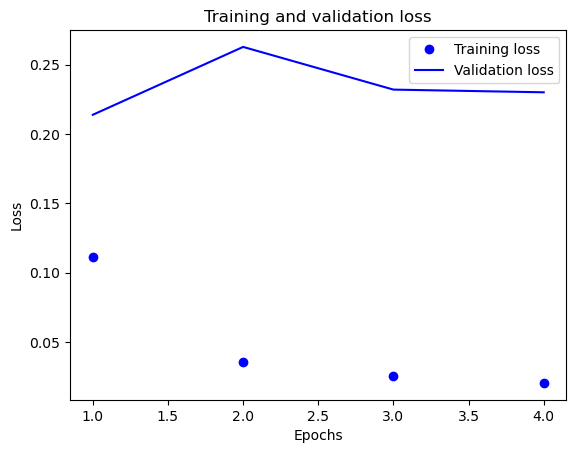

In [41]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

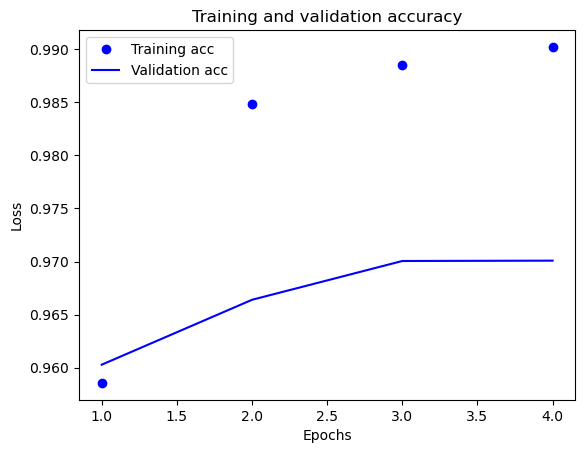

In [42]:
acc_values = hist.history['accuracy']
val_acc_values = hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [47]:
import numpy as np

<h2>Predicting the Model</h2>

In [48]:
model2_pred = np.argmax(model2.predict(scaled_X_test), axis=-1)

9789/9789 ━━━━━━━━━━━━━━━━━━━━ 5s 486us/step


In [49]:
transpose_model2=numpy.transpose([enc_y_test, model2_pred])

In [50]:
transpose_model2

array([[2, 2],
       [2, 2],
       [2, 2],
       ...,
       [2, 2],
       [2, 2],
       [2, 2]])

<h2>Generating the Results </h2>

In [51]:
encoder.classes_

array(['impersonation', 'injection', 'normal'], dtype=object)

In [52]:
target_names=[encoder.classes_[0], encoder.classes_[1], encoder.classes_[2]]

In [53]:
result_model2= classification_report(enc_y_test, model2_pred, target_names= target_names)

In [54]:
print(result_model2)

               precision    recall  f1-score   support

impersonation       0.03      0.00      0.00     18606
    injection       0.39      0.99      0.57     16682
       normal       1.00      0.97      0.99    277960

     accuracy                           0.92    313248
    macro avg       0.48      0.66      0.52    313248
 weighted avg       0.91      0.92      0.91    313248



<h2>Reshaping to the array to 3-Dimensional array  </h2>

In [55]:
#Reshape input to be [samples, time steps, features] to work with LSTM

third_X_train = numpy.reshape(scaled_X_train, (scaled_X_train.shape[0], 1, scaled_X_train.shape[1]))
third_X_train.shape

(885744, 1, 76)

In [56]:
third_X_test = numpy.reshape(scaled_X_test,(scaled_X_test.shape[0], 1, scaled_X_test.shape[1]))
third_X_test.shape

(313248, 1, 76)

<h2>Using Recurrent Neural Network with LSTM </h2>

In [57]:
#Using multiple layer of LSTM
multi_lstm_model=Sequential()

multi_lstm_model.add(LSTM(10,input_shape=(1, third_X_train.shape[2]),
                    return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(LSTM(20, return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(Flatten())
multi_lstm_model.add(Dense(3, activation='softmax'))

multi_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

multi_lstm_model.summary()

/home/sriramchinmay/miniforge3/envs/workstation/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 10)          │         3,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 20)          │         2,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 20)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,023 (23.53 KB)

 Trainable params: 6,023 (23.53 KB)

 Non-trainable params: 0 (0.00 B)

<h2>Training and evaluating the model with more layers </h2>

In [60]:
history_lstm1=multi_lstm_model.fit(third_X_train, cat_y_train,batch_size=128,
               epochs=5, callbacks=[earlystop],validation_split=0.15, verbose=1)

Epoch 1/5
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9980 - loss: 0.0071 - val_accuracy: 0.9804 - val_loss: 0.0892
Epoch 2/5
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9807 - val_loss: 0.0859
Epoch 3/5
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9807 - val_loss: 0.0653
Epoch 4/5
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9982 - loss: 0.0067 - val_accuracy: 0.9809 - val_loss: 0.0637
Epoch 5/5
5882/5882 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9982 - loss: 0.0069 - val_accuracy: 0.9807 - val_loss: 0.0817
Restoring model weights from the end of the best epoch: 4.


In [59]:
multi_lstm_model.evaluate(third_X_train, cat_y_train)

27680/27680 ━━━━━━━━━━━━━━━━━━━━ 25s 914us/step - accuracy: 0.9997 - loss: 0.0017


[0.011268779635429382, 0.9966559410095215]

In [52]:
lstm1_loss, lstm1_accuracy = multi_lstm_model.evaluate(third_X_test, cat_y_test)

313248/313248 [==============================] - 6s 19us/step


In [53]:
print('Loss :{loss},\nAccuracy of LSTM Model : {accuracy}'.format(loss=lstm1_loss,accuracy=lstm1_accuracy))

Loss :1.8630824964943937,
Accuracy of LSTM Model : 0.8670318722724915


<h2> Plotting the Training/Validation Loss and Accuracy of more LSTM layers</h2>

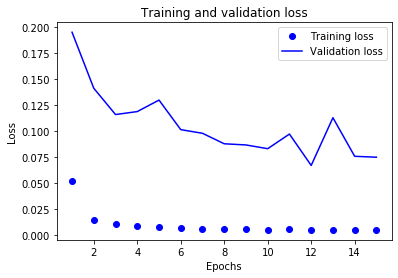

In [54]:
import matplotlib.pyplot as plt

acc = history_lstm1.history['accuracy']
val_acc = history_lstm1.history['val_accuracy']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss,  'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

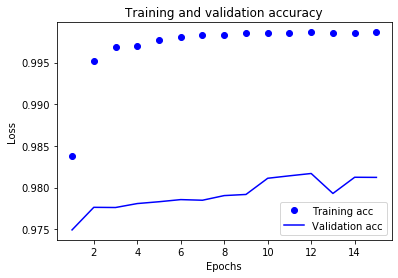

In [55]:
acc_values = history_lstm1.history['accuracy']
val_acc_values = history_lstm1.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Predicting the Model and Generating the Outcome </h2>

In [56]:
multi_lstm_preds=multi_lstm_model.predict_classes(third_X_test)

In [57]:
transpose=numpy.transpose([enc_y_test, multi_lstm_preds])


In [58]:
transpose

array([[2, 2],
       [2, 2],
       [2, 2],
       ...,
       [2, 2],
       [2, 2],
       [2, 2]], dtype=int64)

In [59]:
#From the below code we can observe the predicted and actual label
#come
outcome_range=100
for i in range(outcome_range):
    prediction = encoder.classes_[transpose[i,1]]
    actual = encoder.classes_[transpose[i,0]]
    print( "At line",i, "The model predicted :", prediction, ", When the Actual is :", actual)

At line 0 The model predicted : normal , When the Actual is : normal
At line 1 The model predicted : normal , When the Actual is : normal
At line 2 The model predicted : normal , When the Actual is : normal
At line 3 The model predicted : normal , When the Actual is : normal
At line 4 The model predicted : normal , When the Actual is : normal
At line 5 The model predicted : normal , When the Actual is : normal
At line 6 The model predicted : normal , When the Actual is : normal
At line 7 The model predicted : normal , When the Actual is : normal
At line 8 The model predicted : normal , When the Actual is : normal
At line 9 The model predicted : normal , When the Actual is : normal
At line 10 The model predicted : normal , When the Actual is : normal
At line 11 The model predicted : normal , When the Actual is : normal
At line 12 The model predicted : normal , When the Actual is : normal
At line 13 The model predicted : normal , When the Actual is : normal
At line 14 The model predicted

<h2>Generating Precision/Recall and F1-score Report </h2>

In [60]:
encoder.classes_

array(['impersonation', 'injection', 'normal'], dtype=object)

In [61]:
target_names=[encoder.classes_[0], encoder.classes_[1], encoder.classes_[2]]

In [62]:
result_lstm1 = classification_report(enc_y_test, multi_lstm_preds, target_names=target_names)

In [63]:
print(result_lstm1)
#USING LSTM With more layer and neuron, we may get better result

               precision    recall  f1-score   support

impersonation       0.04      0.00      0.00     18606
    injection       0.01      0.01      0.01     16682
       normal       0.91      0.98      0.94    277960

     accuracy                           0.87    313248
    macro avg       0.32      0.33      0.32    313248
 weighted avg       0.81      0.87      0.84    313248



In [64]:
print(result_model2)

               precision    recall  f1-score   support

impersonation       0.00      0.00      0.00     18606
    injection       0.35      0.90      0.50     16682
       normal       0.99      0.96      0.98    277960

     accuracy                           0.90    313248
    macro avg       0.45      0.62      0.49    313248
 weighted avg       0.90      0.90      0.89    313248

